In [ ]:
!pip install tensorflow

In [ ]:
!pip install --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 85.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 91.8 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow

In [ ]:
!pip install seaborn

In [ ]:
!pip install numpy

In [ ]:
!pip install matplotlib
!pip install scikit-learn
!pip install tensorflow

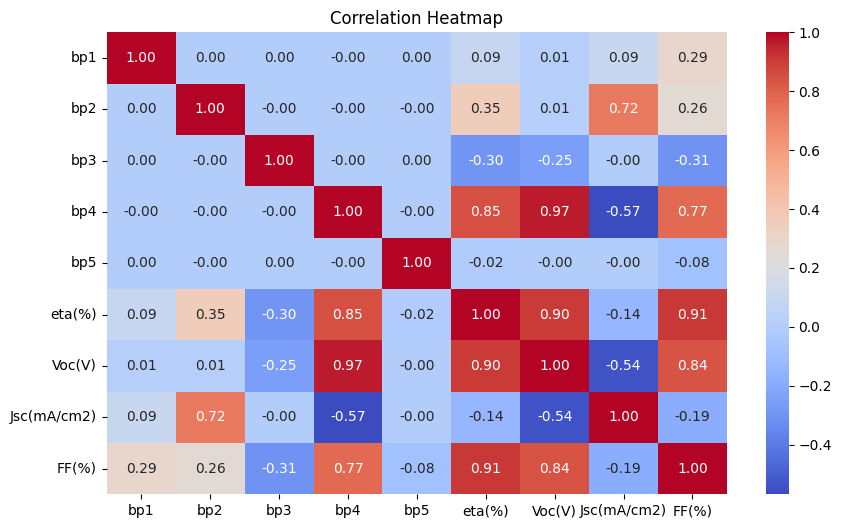

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  

🔹 ANN R² Score: 0.9987
  1/157 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

🔹 Best Input Values for Maximum Efficiency and Fill Factor:
bp1: 5.11035
bp2: 0.46523
bp3: 297.47335
bp4: 1.59914
bp5: 11.87800

🔹 Predicted Output Values for Best Inputs:
eta (%): 30.13779
FF (%): 87.74944


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load your dataset (assuming it's already in a DataFrame called df)
df = pd.read_excel('/content/Separated_dataset.xlsx')  # Uncomment if loading from CSV
df.columns = df.columns.str.replace(' ', '')
# Convert bp5 to log scale
df['bp5'] = np.log10(df['bp5'])

# Define input and output columns
input_cols = ['bp1', 'bp2', 'bp3', 'bp4', 'bp5']
output_cols = ['eta(%)', 'FF(%)']

# Normalize input and output parameters
scaler_input = MinMaxScaler()
scaler_output = MinMaxScaler()

df[input_cols] = scaler_input.fit_transform(df[input_cols])
df[output_cols] = scaler_output.fit_transform(df[output_cols])

# Draw correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Prepare data
X = df[input_cols].values
Y = df[output_cols].values  # Predicting only eta and FF

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define ANN model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(2, activation='linear')
])

# Compile and train ANN
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(X_train, Y_train, epochs=100, batch_size=8, validation_data=(X_test, Y_test), verbose=0)

# Evaluate ANN on test data
Y_pred = model.predict(X_test)
r2 = r2_score(Y_test, Y_pred)

print(f"\n🔹 ANN R² Score: {r2:.4f}")

# Find Best Input Values for Maximum eta and FF
input_ranges = {
    'bp1': [1.00, 6.00],
    'bp2': [0.10, 0.50],
    'bp3': [295, 330],
    'bp4': [1.30, 1.60],
    'bp5': [11, 14]  # Updated log-scale range
}

# Generate random samples within constraints
samples = 5000
random_inputs = np.array([
    np.random.uniform(*input_ranges[key], samples) for key in input_cols
]).T

# Normalize the random inputs
random_inputs_scaled = scaler_input.transform(random_inputs)

# Predict using ANN
predictions = model.predict(random_inputs_scaled)

# Find the best input corresponding to the highest efficiency (eta)
best_index = np.argmax(predictions[:, 0])  # Maximize eta
best_inputs_scaled = random_inputs_scaled[best_index]
best_inputs = scaler_input.inverse_transform([best_inputs_scaled])

# Get predicted eta and FF values for the best inputs
best_outputs_scaled = predictions[best_index]
best_outputs = scaler_output.inverse_transform([best_outputs_scaled])

# Display results
print("\n🔹 Best Input Values for Maximum Efficiency and Fill Factor:")
for i, col in enumerate(input_cols):
    print(f"{col}: {best_inputs[0][i]:.5f}")

print("\n🔹 Predicted Output Values for Best Inputs:")
print(f"eta (%): {best_outputs[0][0]:.5f}")
print(f"FF (%): {best_outputs[0][1]:.5f}")


In [ ]:
bp5_final = 10**best_inputs[0][4]
print(bp5_final)

755092679410.3091


Plotting Error


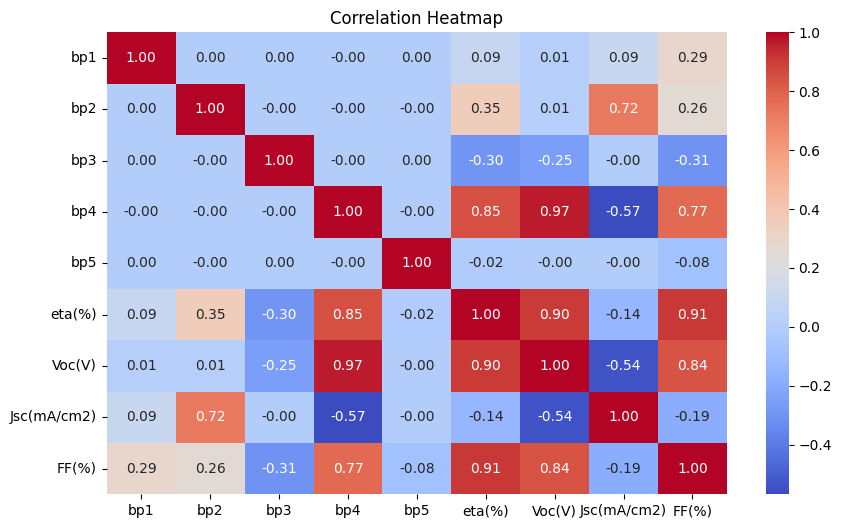

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

🔹 ANN R² Score: 0.9976
 93/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

🔹 Best Input Values for Maximum Efficiency and Fill Factor:
bp1: 1.73990
bp2: 0.49428
bp3: 296.48775
bp4: 1.59838
bp5: 13.23687

🔹 Predicted Output Values for Best Inputs:
eta (%): 30.38800
FF (%): 87.26654


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load your dataset (assuming it's already in a DataFrame called df)
df = pd.read_excel('/content/Separated_dataset.xlsx')  # Uncomment if loading from CSV
df.columns = df.columns.str.replace(' ', '')
# Convert bp5 to log scale
df['bp5'] = np.log10(df['bp5'])

# Define input and output columns
input_cols = ['bp1', 'bp2', 'bp3', 'bp4', 'bp5']
output_cols = ['eta(%)', 'FF(%)']

# Normalize input and output parameters
scaler_input = MinMaxScaler()
scaler_output = MinMaxScaler()

df[input_cols] = scaler_input.fit_transform(df[input_cols])
df[output_cols] = scaler_output.fit_transform(df[output_cols])

# Draw correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Prepare data
X = df[input_cols].values
Y = df[output_cols].values  # Predicting only eta and FF

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define ANN model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(2, activation='linear')
])

# Compile and train ANN
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(X_train, Y_train, epochs=100, batch_size=8, validation_data=(X_test, Y_test), verbose=0)

# Evaluate ANN on test data
Y_pred = model.predict(X_test)
r2 = r2_score(Y_test, Y_pred)

print(f"\n🔹 ANN R² Score: {r2:.4f}")

# Find Best Input Values for Maximum eta and FF
input_ranges = {
    'bp1': [1.00, 6.00],
    'bp2': [0.10, 0.50],
    'bp3': [295, 330],
    'bp4': [1.30, 1.60],
    'bp5': [11, 14]  # Updated log-scale range
}

# Generate random samples within constraints
samples = 5000
random_inputs = np.array([
    np.random.uniform(*input_ranges[key], samples) for key in input_cols
]).T

# Normalize the random inputs
random_inputs_scaled = scaler_input.transform(random_inputs)

# Predict using ANN
predictions = model.predict(random_inputs_scaled)

# Find the best input corresponding to the highest efficiency (eta)
best_index = np.argmax(predictions[:, 0])  # Maximize eta
best_inputs_scaled = random_inputs_scaled[best_index]
best_inputs = scaler_input.inverse_transform([best_inputs_scaled])

# Get predicted eta and FF values for the best inputs
best_outputs_scaled = predictions[best_index]
best_outputs = scaler_output.inverse_transform([best_outputs_scaled])

# Display results
print("\n🔹 Best Input Values for Maximum Efficiency and Fill Factor:")
for i, col in enumerate(input_cols):
    print(f"{col}: {best_inputs[0][i]:.5f}")

print("\n🔹 Predicted Output Values for Best Inputs:")
print(f"eta (%): {best_outputs[0][0]:.5f}")
print(f"FF (%): {best_outputs[0][1]:.5f}")



🔹 ANN MSE: 0.00010
🔹 ANN RMSE: 0.00984


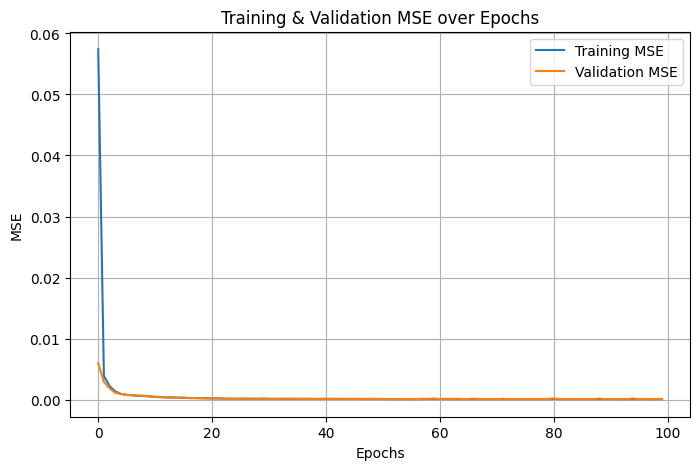

In [ ]:
from sklearn.metrics import mean_squared_error

# Compute MSE and RMSE
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)

print(f"\n🔹 ANN MSE: {mse:.5f}")
print(f"🔹 ANN RMSE: {rmse:.5f}")

# Plot Training vs Validation Loss (MSE)
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training MSE')
plt.plot(history.history['val_loss'], label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Training & Validation MSE over Epochs')
plt.legend()
plt.grid(True)
plt.show()


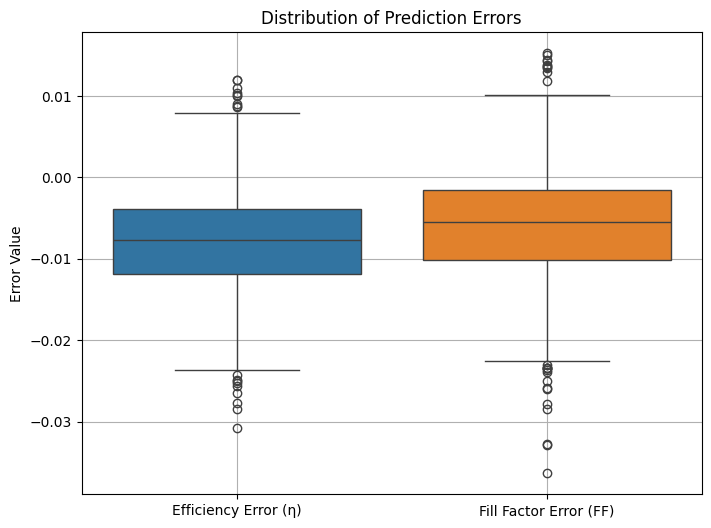

In [ ]:
# Compute errors
errors_eta = Y_test[:, 0] - Y_pred[:, 0]  # Error for eta
errors_FF = Y_test[:, 1] - Y_pred[:, 1]  # Error for FF

# Create DataFrame for visualization
error_df = pd.DataFrame({
    'Efficiency Error (η)': errors_eta,
    'Fill Factor Error (FF)': errors_FF
})

# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=error_df)
plt.ylabel("Error Value")
plt.title("Distribution of Prediction Errors")
plt.grid(True)
plt.show()


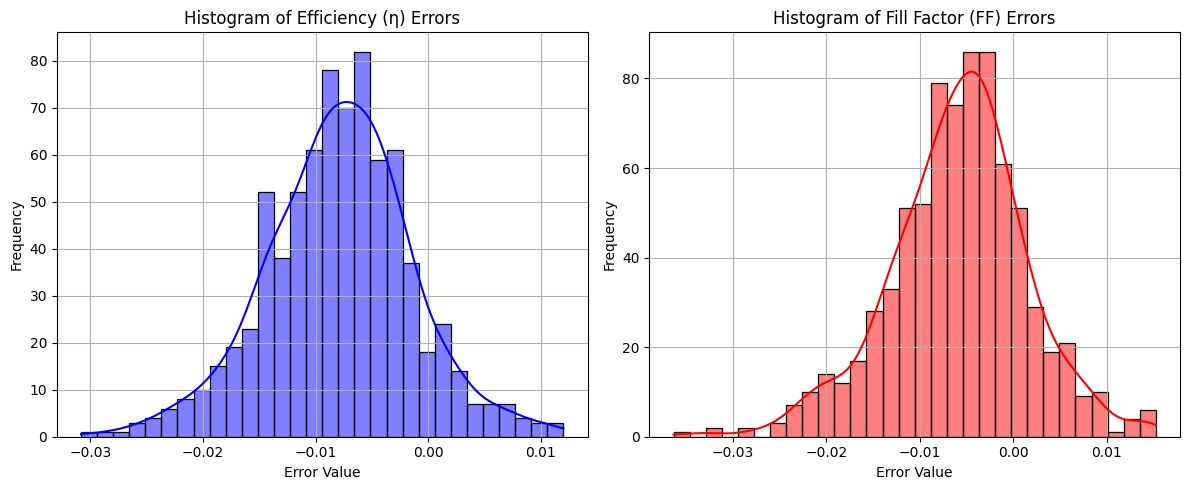

In [ ]:
# Set figure size
plt.figure(figsize=(12, 5))

# Histogram for eta (Efficiency)
plt.subplot(1, 2, 1)
sns.histplot(errors_eta, bins=30, kde=True, color="blue")
plt.xlabel("Error Value")
plt.ylabel("Frequency")
plt.title("Histogram of Efficiency (η) Errors")
plt.grid(True)

# Histogram for FF (Fill Factor)
plt.subplot(1, 2, 2)
sns.histplot(errors_FF, bins=30, kde=True, color="red")
plt.xlabel("Error Value")
plt.ylabel("Frequency")
plt.title("Histogram of Fill Factor (FF) Errors")
plt.grid(True)

# Show plots
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import KFold

# Define number of folds
k = 5  # 5-Fold Cross-Validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Store R² scores for each fold
r2_scores = []

for train_idx, val_idx in kf.split(X):
    X_train, X_val = X[train_idx], X[val_idx]
    Y_train, Y_val = Y[train_idx], Y[val_idx]

    # Define new ANN model for each fold
    model = Sequential([
        Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(16, activation='relu'),
        Dense(2, activation='linear')
    ])

    # Compile and train
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    model.fit(X_train, Y_train, epochs=100, batch_size=8, verbose=0)  # Silent training

    # Predict on validation set
    Y_val_pred = model.predict(X_val)

    # Compute R² score and store it
    r2 = r2_score(Y_val, Y_val_pred)
    r2_scores.append(r2)

# Compute and print average R² score
avg_r2 = np.mean(r2_scores)
print(f"\n🔹 Average R² Score over {k}-Fold Cross-Validation: {avg_r2:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

🔹 Average R² Score over 5-Fold Cross-Validation: 0.9983


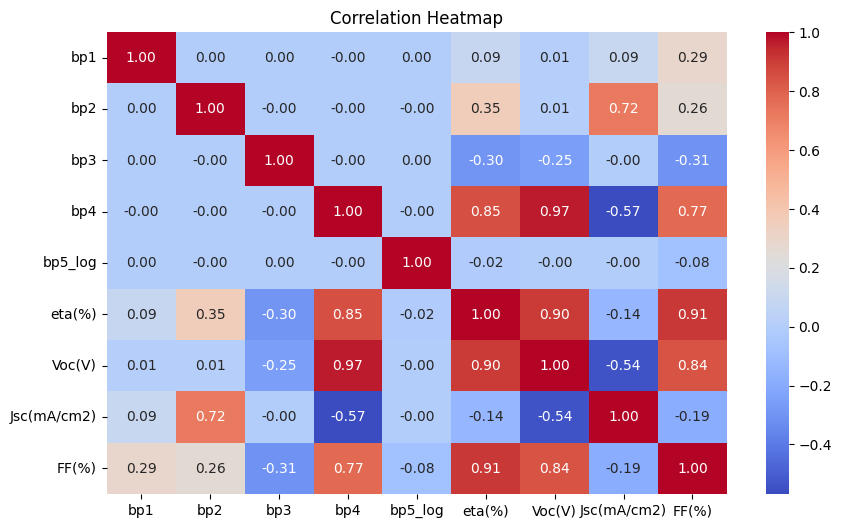

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

🔹 ANN R² Score: 0.9983
 58/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

🔹 Best Input Values for Maximum Efficiency and Fill Factor:
bp1: 2.34502
bp2: 0.49868
bp3: 295.50110
bp4: 1.59710
bp5_log: 12.75848

🔹 Predicted Output Values for Best Inputs:
eta (%): 30.39015
FF (%): 87.64283


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load your dataset (assuming it's already in a DataFrame called df)
df = pd.read_excel('/content/Separated_dataset.xlsx')  # Uncomment if loading from CSV
df.columns = df.columns.str.replace(' ', '')
# Convert bp5 to log scale
df['bp5_log'] = np.log10(df['bp5_log'])

# Define input and output columns
input_cols = ['bp1', 'bp2', 'bp3', 'bp4', 'bp5_log']
output_cols = ['eta(%)', 'FF(%)']

# Normalize input and output parameters
scaler_input = MinMaxScaler()
scaler_output = MinMaxScaler()

df[input_cols] = scaler_input.fit_transform(df[input_cols])
df[output_cols] = scaler_output.fit_transform(df[output_cols])

# Draw correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Prepare data
X = df[input_cols].values
Y = df[output_cols].values  # Predicting only eta and FF

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define ANN model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(2, activation='linear')
])

# Compile and train ANN
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(X_train, Y_train, epochs=100, batch_size=8, validation_data=(X_test, Y_test), verbose=0)

# Evaluate ANN on test data
Y_pred = model.predict(X_test)
r2 = r2_score(Y_test, Y_pred)

print(f"\n🔹 ANN R² Score: {r2:.4f}")

# Find Best Input Values for Maximum eta and FF
input_ranges = {
    'bp1': [1.00, 6.00],
    'bp2': [0.10, 0.50],
    'bp3': [295, 330],
    'bp4': [1.30, 1.60],
    'bp5_log': [11, 14]  # Updated log-scale range
}

# Generate random samples within constraints
samples = 5000
random_inputs = np.array([
    np.random.uniform(*input_ranges[key], samples) for key in input_cols
]).T

# Normalize the random inputs
random_inputs_scaled = scaler_input.transform(random_inputs)

# Predict using ANN
predictions = model.predict(random_inputs_scaled)

# Find the best input corresponding to the highest efficiency (eta)
best_index = np.argmax(predictions[:, 0])  # Maximize eta
best_inputs_scaled = random_inputs_scaled[best_index]
best_inputs = scaler_input.inverse_transform([best_inputs_scaled])

# Get predicted eta and FF values for the best inputs
best_outputs_scaled = predictions[best_index]
best_outputs = scaler_output.inverse_transform([best_outputs_scaled])

# Display results
print("\n🔹 Best Input Values for Maximum Efficiency and Fill Factor:")
for i, col in enumerate(input_cols):
    print(f"{col}: {best_inputs[0][i]:.5f}")

print("\n🔹 Predicted Output Values for Best Inputs:")
print(f"eta (%): {best_outputs[0][0]:.5f}")
print(f"FF (%): {best_outputs[0][1]:.5f}")
